In [2]:
path='ch02/usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
"""
import json
path='ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records=[json.loads(line) for line in open(path)]
"""
# 기본 인코딩이 UTF가 아닌 경우

UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 6987: illegal multibyte sequence

In [4]:
import json
path='ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records=[json.loads(line) for line in open(path, encoding='UTF8')]

In [8]:
len(records)

3560

In [9]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [10]:
records[0]['tz']

'America/New_York'

In [11]:
print(records[0]['tz'])

America/New_York


In [12]:
#time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [13]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [14]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [15]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [16]:
from collections import defaultdict
def get_counts2(sequence):
    counts=defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [17]:
counts=get_counts(time_zones)

In [18]:
counts['America/New_York']

1251

In [19]:
len(time_zones)

3440

In [21]:
len(counts)

97

In [24]:
counts

{'': 521,
 'Africa/Cairo': 3,
 'Africa/Casablanca': 1,
 'Africa/Ceuta': 2,
 'Africa/Johannesburg': 1,
 'Africa/Lusaka': 1,
 'America/Anchorage': 5,
 'America/Argentina/Buenos_Aires': 1,
 'America/Argentina/Cordoba': 1,
 'America/Argentina/Mendoza': 1,
 'America/Bogota': 3,
 'America/Caracas': 1,
 'America/Chicago': 400,
 'America/Chihuahua': 2,
 'America/Costa_Rica': 1,
 'America/Denver': 191,
 'America/Edmonton': 6,
 'America/Guayaquil': 2,
 'America/Halifax': 4,
 'America/Indianapolis': 20,
 'America/La_Paz': 1,
 'America/Lima': 1,
 'America/Los_Angeles': 382,
 'America/Managua': 3,
 'America/Mazatlan': 1,
 'America/Mexico_City': 15,
 'America/Monterrey': 1,
 'America/Montevideo': 1,
 'America/Montreal': 9,
 'America/New_York': 1251,
 'America/Phoenix': 20,
 'America/Puerto_Rico': 10,
 'America/Rainy_River': 25,
 'America/Recife': 2,
 'America/Santo_Domingo': 1,
 'America/Sao_Paulo': 33,
 'America/St_Kitts': 1,
 'America/Tegucigalpa': 1,
 'America/Vancouver': 12,
 'America/Winnipeg':

In [25]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [26]:
counts.items()

dict_items([('America/New_York', 1251), ('America/Denver', 191), ('America/Sao_Paulo', 33), ('Europe/Warsaw', 16), ('', 521), ('America/Los_Angeles', 382), ('Asia/Hong_Kong', 10), ('Europe/Rome', 27), ('Africa/Ceuta', 2), ('Europe/Madrid', 35), ('Asia/Kuala_Lumpur', 3), ('Asia/Nicosia', 1), ('Europe/London', 74), ('Pacific/Honolulu', 36), ('America/Chicago', 400), ('Europe/Malta', 2), ('Europe/Lisbon', 8), ('Europe/Paris', 14), ('Europe/Copenhagen', 5), ('America/Mazatlan', 1), ('Europe/Dublin', 3), ('Europe/Brussels', 4), ('America/Vancouver', 12), ('Europe/Amsterdam', 22), ('Europe/Prague', 10), ('Europe/Stockholm', 14), ('America/Anchorage', 5), ('Asia/Bangkok', 6), ('Europe/Berlin', 28), ('America/Rainy_River', 25), ('Europe/Budapest', 5), ('Asia/Tokyo', 37), ('Europe/Vienna', 6), ('America/Phoenix', 20), ('Asia/Jerusalem', 3), ('Asia/Karachi', 3), ('America/Bogota', 3), ('America/Indianapolis', 20), ('America/Montreal', 9), ('Asia/Calcutta', 9), ('Europe/Skopje', 1), ('Asia/Beirut

In [27]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [28]:
from collections import Counter
counts=Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# 2.1.2 pandas로 표준 시간대 세어보기

In [29]:
from pandas import DataFrame, Series

import pandas as pd

frame= DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [30]:
frame.shape

(3560, 18)

In [31]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [32]:
tz_counts = frame['tz']. value_counts()

In [33]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [34]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

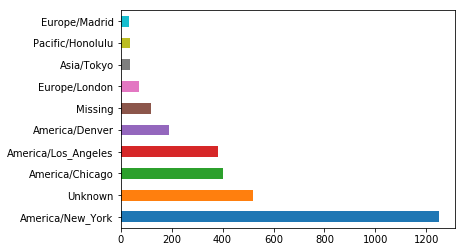

In [36]:
% matplotlib inline
tz_counts[:10].plot(kind='barh', rot=0)

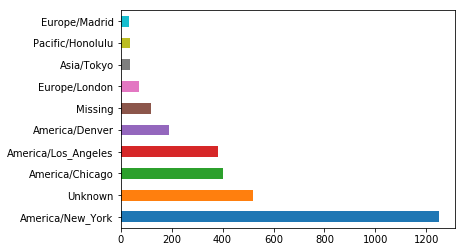

In [37]:
tz_counts[:10].plot(kind='barh')

In [38]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [39]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [40]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [41]:
results=Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [42]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [43]:
cframe = frame[frame.a.notnull()]

In [44]:
cframe

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [45]:
import numpy as np
operating_system = np.where(cframe['a'].str.contains('Window'), 'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [46]:
by_tz_os = cframe.groupby(['tz',operating_system])

In [47]:
by_tz_os

In [48]:
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [49]:
by_tz_os.size().unstack()

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
Africa/Lusaka,NaN,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,NaN
America/Argentina/Cordoba,NaN,1.0


In [50]:
agg_counts=by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [51]:
indexer=agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [52]:
agg_counts.sum(1)

tz
                                   521.0
Africa/Cairo                         3.0
Africa/Casablanca                    1.0
Africa/Ceuta                         2.0
Africa/Johannesburg                  1.0
Africa/Lusaka                        1.0
America/Anchorage                    5.0
America/Argentina/Buenos_Aires       1.0
America/Argentina/Cordoba            1.0
America/Argentina/Mendoza            1.0
America/Bogota                       3.0
America/Caracas                      1.0
America/Chicago                    400.0
America/Chihuahua                    2.0
America/Costa_Rica                   1.0
America/Denver                     191.0
America/Edmonton                     6.0
America/Guayaquil                    2.0
America/Halifax                      4.0
America/Indianapolis                20.0
America/La_Paz                       1.0
America/Lima                         1.0
America/Los_Angeles                382.0
America/Managua                      3.0
America/Mazat

In [53]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


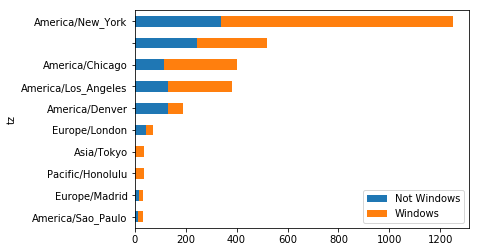

In [54]:
count_subset.plot(kind='barh', stacked=True)

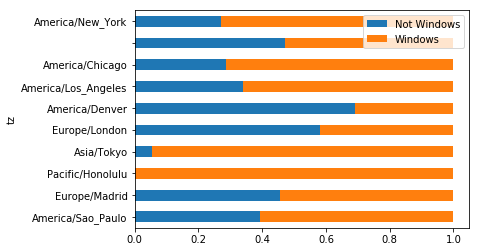

In [55]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

# 2.2 MovieLens의 영화 평점 데이터